In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/LoanData.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [14]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection

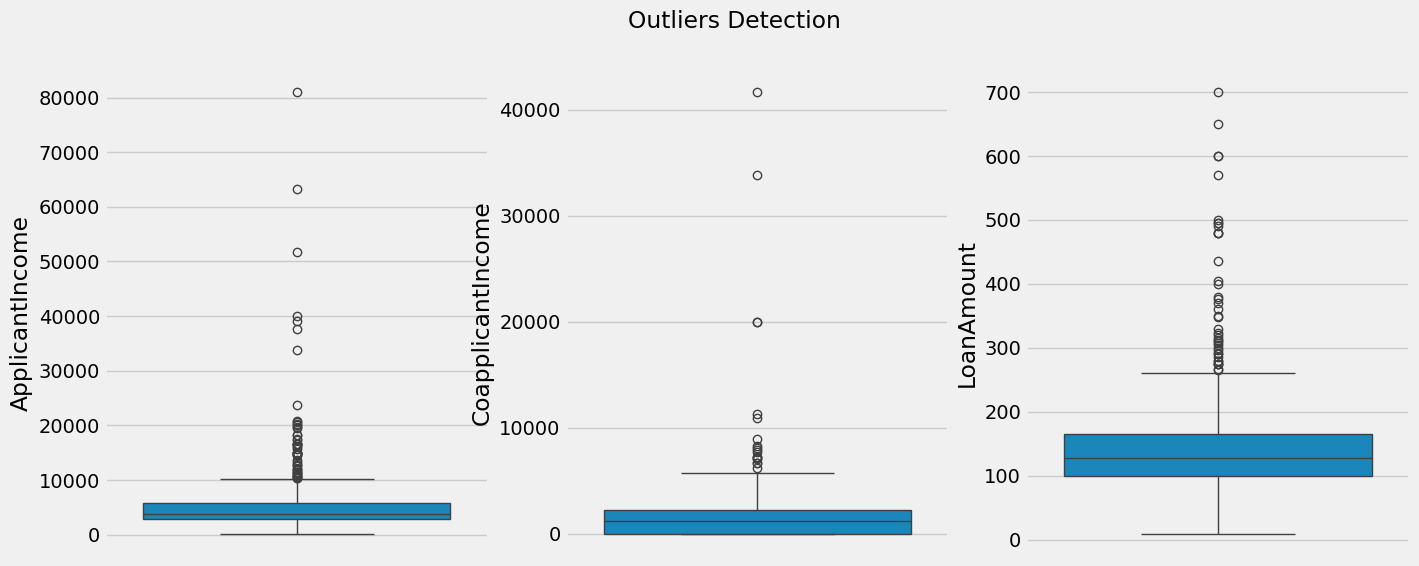

In [17]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,6)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Detection')
plt.show()

In [18]:
print("Before",data.shape)
data = data[data['ApplicantIncome']<25000]
print("After",data.shape)

Before (614, 13)
After (607, 13)


In [19]:
print("Before",data.shape)
data = data[data['CoapplicantIncome']<12000]
print("After",data.shape)

Before (607, 13)
After (603, 13)


In [20]:
print("Before",data.shape)
data = data[data['LoanAmount']<400]
print("After",data.shape)

Before (603, 13)
After (591, 13)


# Data Analysis

In [ ]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'],color='green')

In [ ]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'],color='green')

plt.suptitle('After Log')
plt.show()

In [27]:
num = data.select_dtypes('number').columns.to_list()
cat = data.select_dtypes('object').columns.to_list()

In [28]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [29]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

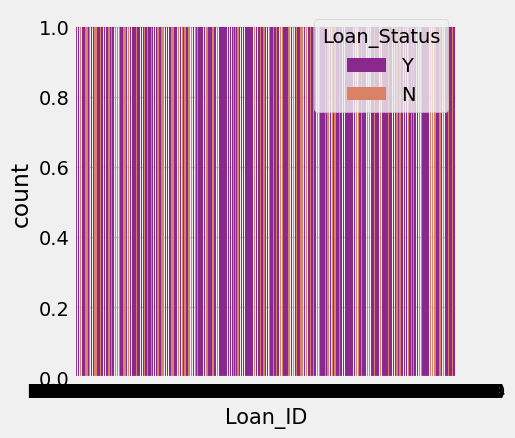

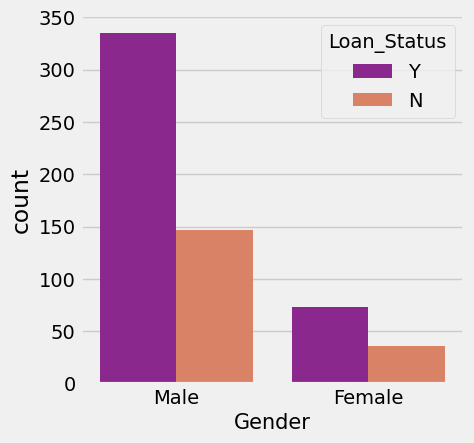

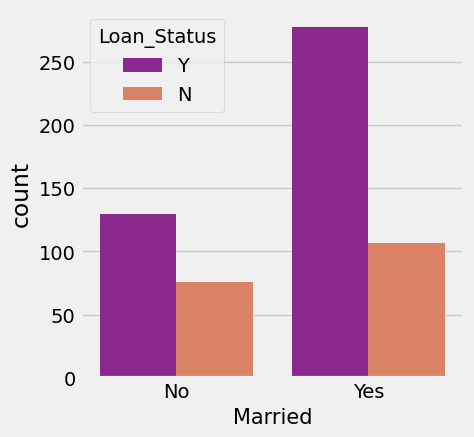

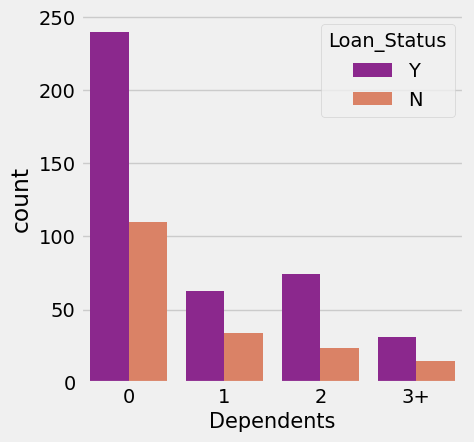

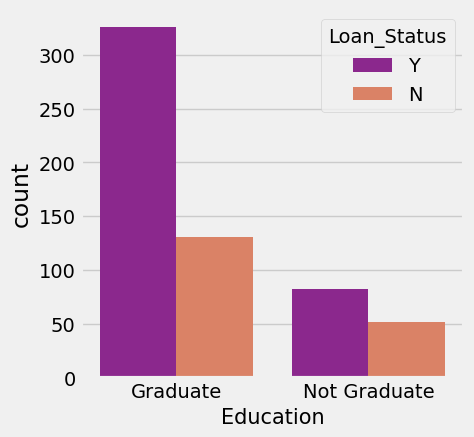

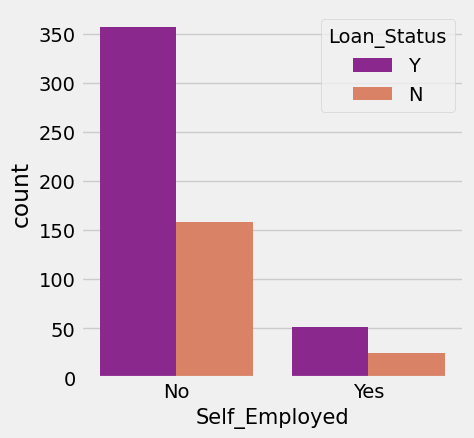

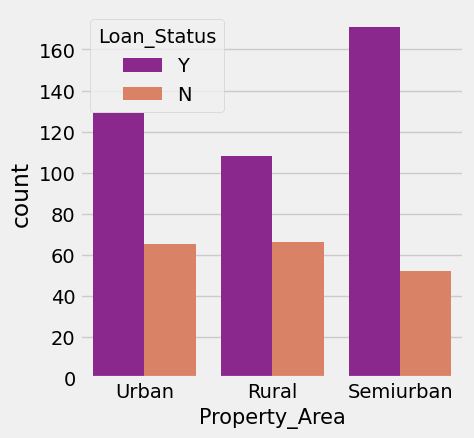

In [30]:
for i in cat[:-1]:
  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  sns.countplot(x=i,hue='Loan_Status',data=data,palette='plasma')
  plt.xlabel(i,fontsize=15)

In [31]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
print(pd.crosstab(data['Loan_Status'],data['Married']))
print()
print(pd.crosstab(data['Loan_Status'],data['Education']))
print()
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))
print()
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [34]:
data = data.drop(['Loan_ID'],axis=1)

In [35]:
data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [37]:
data['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [38]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

In [39]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [40]:
x = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']

In [41]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [42]:
y.shape

(591,)

In [43]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

# Handle Imbalanced Data

In [57]:
from imblearn.over_sampling import SMOTE
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [58]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [59]:
# Train test Split
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [61]:
x_train.shape

(652, 11)

In [62]:
y_test.shape

(164,)

In [63]:
#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred = LR.predict(x_test)

In [66]:
print('Training Accuracy',LR.score(x_train,y_train))
print('Test Accuracy',LR.score(x_test,y_test))

Training Accuracy 0.7837423312883436
Test Accuracy 0.7865853658536586


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        82
           1       0.74      0.89      0.81        82

    accuracy                           0.79       164
   macro avg       0.80      0.79      0.78       164
weighted avg       0.80      0.79      0.78       164



In [68]:
print('Model Accuracy',accuracy_score(y_pred,y_test))

Model Accuracy 0.7865853658536586


In [69]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [71]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [72]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
import pickle

In [75]:
file = open('loan_approval.pkl','wb')
pickle.dump(LR,file)